In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# **Dataset - Company Data**

In [2]:
df = pd.read_csv("/content/Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# **Dataset - Information**

> About the data: 

> Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

1. Sales -- Unit sales (in thousands) at each location
2. Competitor Price -- Price charged by competitor at each location
3. Income -- Community income level (in thousands of dollars)
4. Advertising -- Local advertising budget for company at each location (in thousands of dollars)
5. Population -- Population size in region (in thousands)
6. Price -- Price company charges for car seats at each site
7. Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
8. Age -- Average age of the local population
9. Education -- Education level at each location
10. Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
11. US -- A factor with levels No and Yes to indicate whether the store is in the US or not
 
 



# **Problem Statement:**



* A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# **EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [7]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

Sales 
 7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64
CompPrice 
 121    16
122    14
131    14
123    13
115    12
       ..
94      1
161     1
97      1
88      1
85      1
Name: CompPrice, Length: 73, dtype: int64
Income 
 69     11
42     10
32      8
100     8
67      7
       ..
27      1
114     1
43      1
112     1
23      1
Name: Income, Length: 98, dtype: int64
Advertising 
 0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
4      12
15     12
16     11
8      11
14     11
9      10
2       9
19      8
1       8
6       7
17      6
18      6
20      4
23      2
22      2
24      1
25      1
26      1
29      1
21      1
Name: Advertising, dtype: int64
Population 
 276    4
148    4
237    4
170    4
220    4
      ..
216    1
492    1
356    1
416    1
368    1
Name: Population, Length: 275, dtype: int64
Price 
 120    12
128    12
107    10
1

In [8]:
for col in df:
    print(f'{col}:\n {df[col].unique()}')

Sales:
 [ 9.5  11.22 10.06  7.4   4.15 10.81  6.63 11.85  6.54  4.69  9.01 11.96
  3.98 10.96 11.17  8.71  7.58 12.29 13.91  8.73  6.41 12.13  5.08  5.87
 10.14 14.9   8.33  5.27  2.99  7.81 13.55  8.25  6.2   8.77  2.67 11.07
  8.89  4.95  6.59  3.24  2.07  7.96 10.43  4.12  4.16  4.56 12.44  4.38
  3.91 10.61  1.42  4.42  7.91  6.92  4.9   6.85 11.91  0.91  5.42  5.21
  8.32  7.32  1.82  8.47  7.8   8.85 13.39  7.99  9.46  6.5   5.52 12.61
  8.55 10.64  7.7   4.43  9.14  8.01  7.52 11.62  2.23  8.7  11.7   6.56
  7.95  5.33  4.81  4.53  8.86  8.39  5.58  9.48  7.45 12.49  4.88  4.11
  5.3   5.07  4.62  5.55  0.16  3.47  8.98  9.    6.62  6.67  6.01  9.31
  8.54  8.8   7.57  7.37  6.87 11.67  6.88  8.19  8.87  9.34 11.27  6.52
  4.96  4.47  8.41  9.54  7.62  3.67  6.44  5.17 10.27 12.3   6.03  6.53
  7.44  0.53  9.09  3.9  10.51  7.56 11.48 10.49 10.77  7.64  5.93  6.89
  7.71  7.49 10.21 12.53  9.32  4.67  2.93  3.63  5.68  8.22  0.37  6.71
  7.3   9.03  6.38  0.    7.54  5.61 10.48 

In [9]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 3 categorical variables

The categorical variables are :
 ['ShelveLoc', 'Urban', 'US']


There are 8 Numeric variables

The Numeric variables are :
 ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [10]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


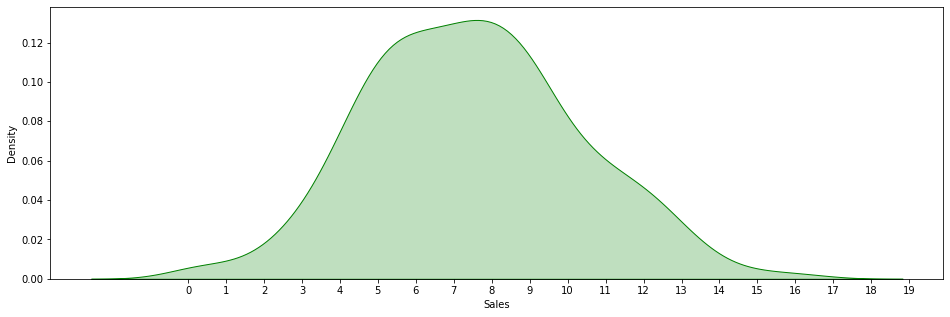

Skew: -0.04275457528359782
Kurtosis: 0.041666402841529226


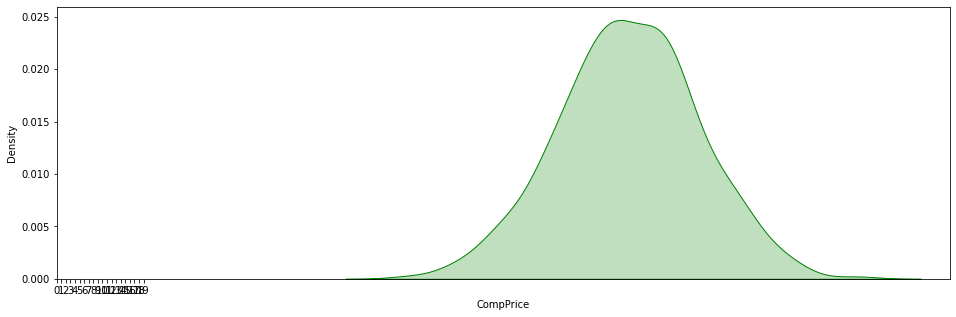

Skew: 0.04944448796161163
Kurtosis: -1.0852889894205275


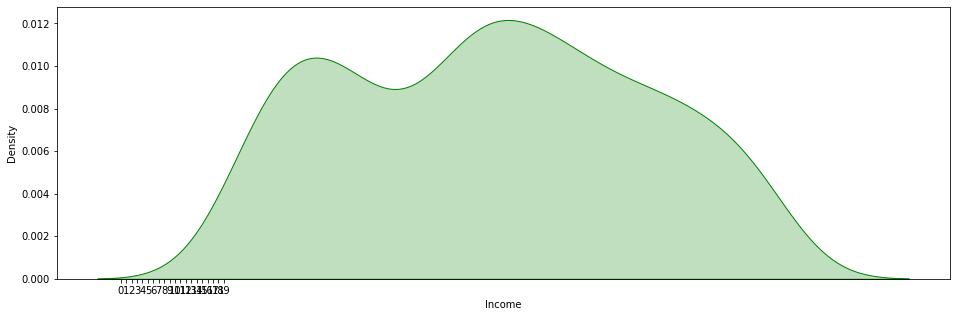

Skew: 0.6395857712012682
Kurtosis: -0.54511783750007


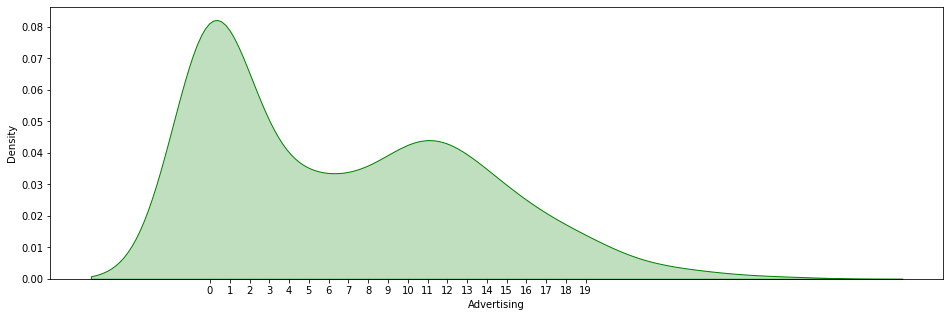

Skew: -0.05122663813815477
Kurtosis: -1.2023183469881713


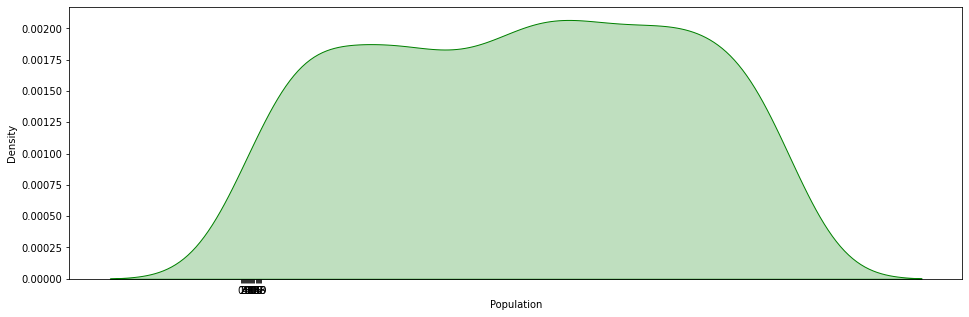

Skew: -0.12528619394494211
Kurtosis: 0.45188500467657766


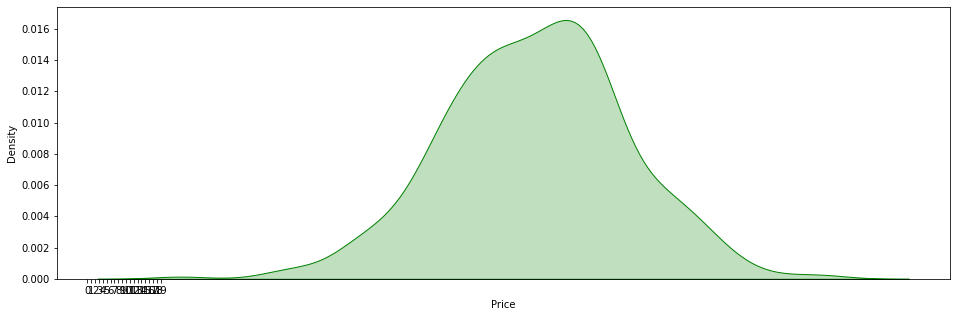

Skew: -0.07718173189535066
Kurtosis: -1.1343919819459476


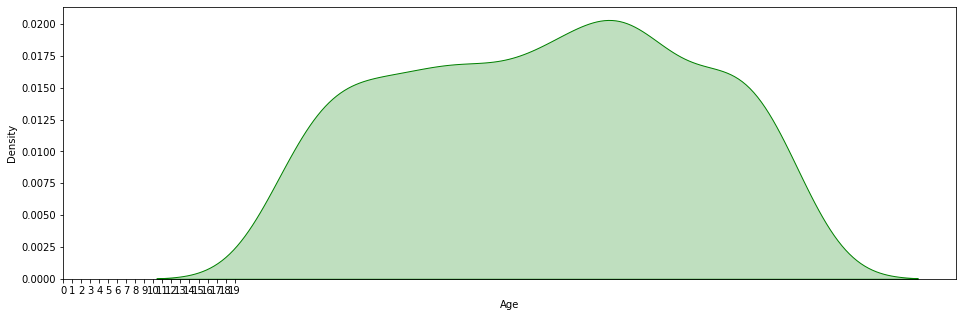

Skew: 0.044006827429473115
Kurtosis: -1.2983317016794282


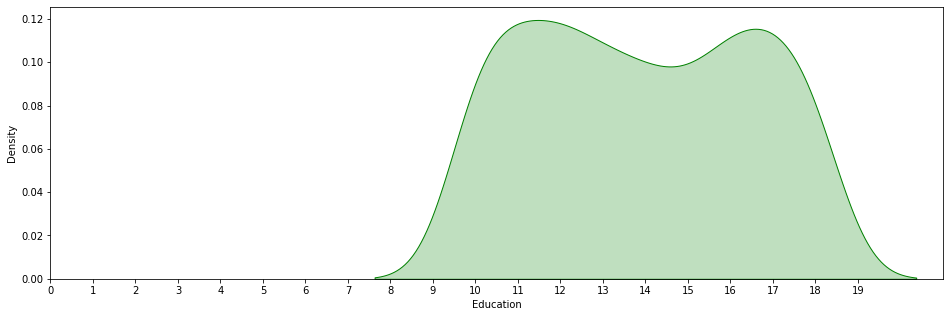

In [11]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(df[i].skew()))
  print("Kurtosis: {}".format(df[i].kurtosis()))
  ax = sns.kdeplot(df[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()


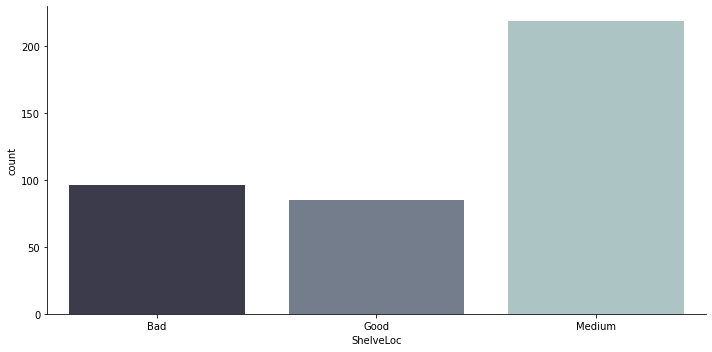

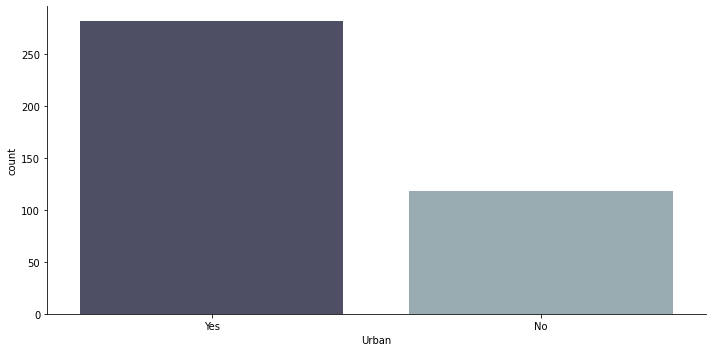

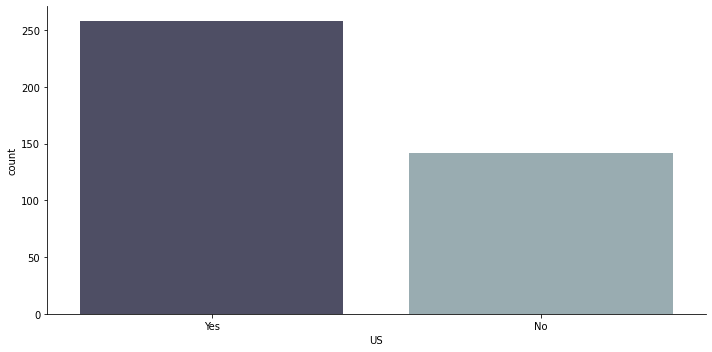

In [12]:
for i in categorical:
  sns.catplot(i, data=df, kind="count",height = 5,aspect = 2, palette="bone")
  

<Figure size 432x288 with 0 Axes>

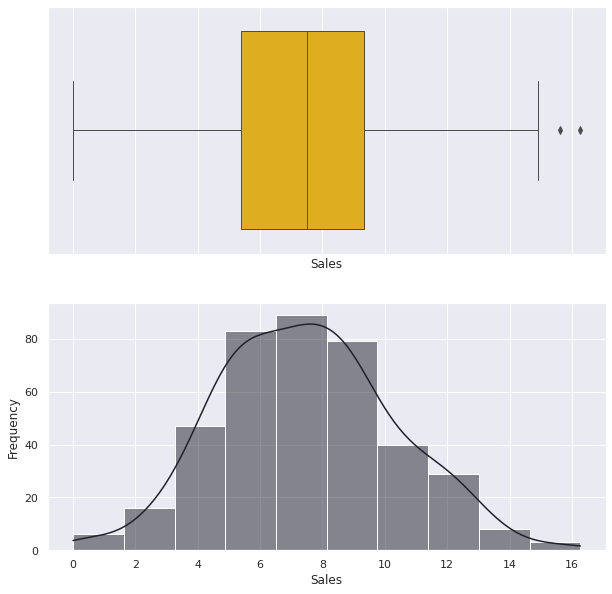

<Figure size 720x720 with 0 Axes>

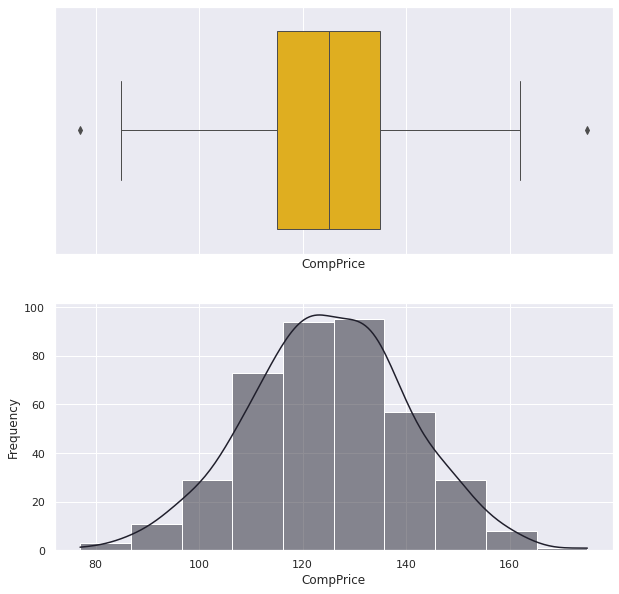

<Figure size 720x720 with 0 Axes>

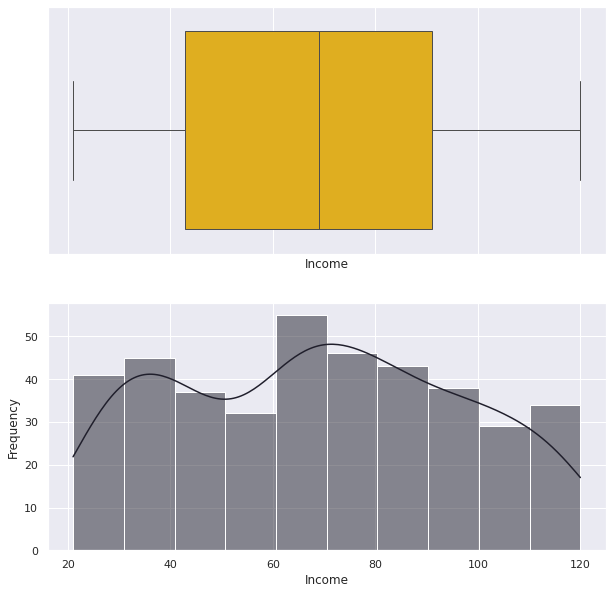

<Figure size 720x720 with 0 Axes>

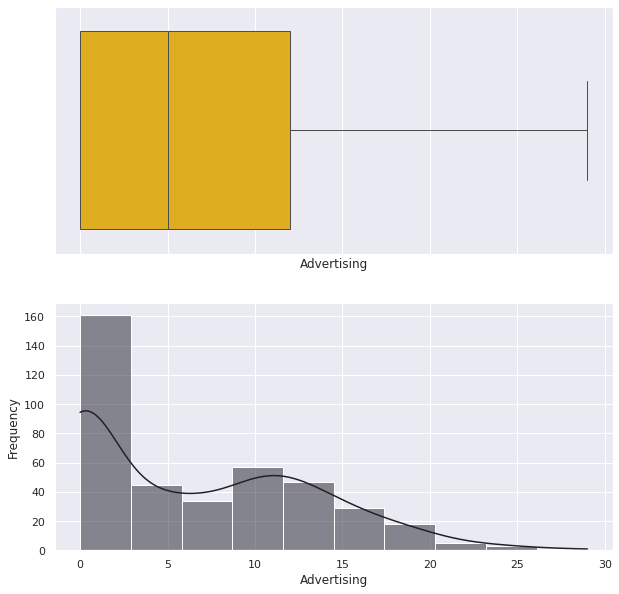

<Figure size 720x720 with 0 Axes>

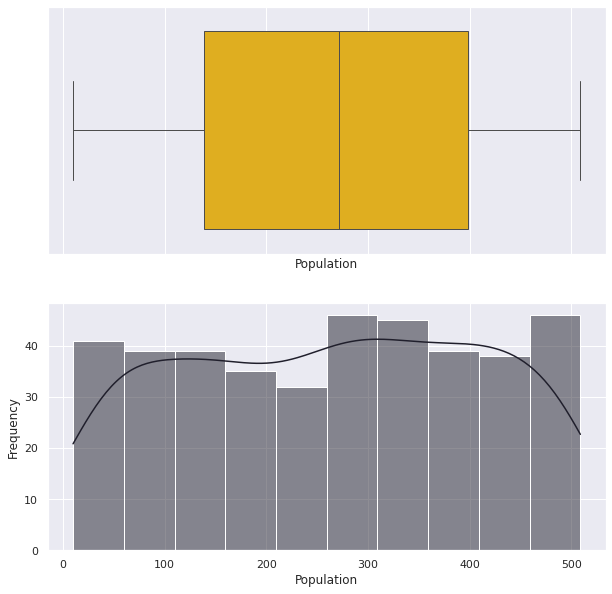

<Figure size 720x720 with 0 Axes>

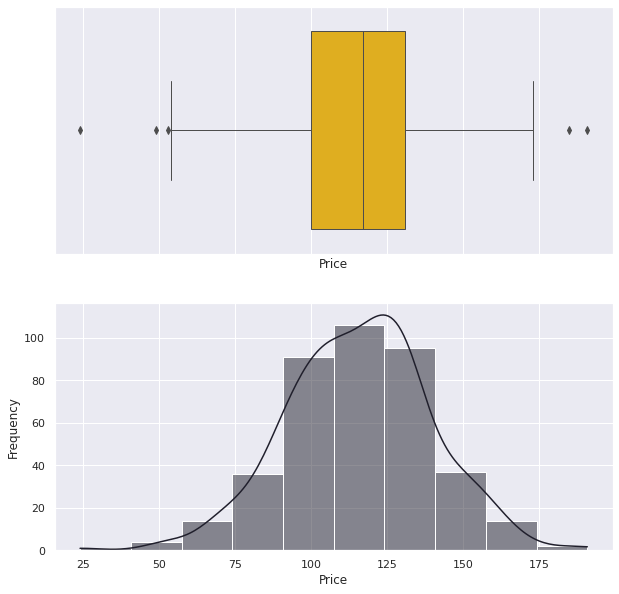

<Figure size 720x720 with 0 Axes>

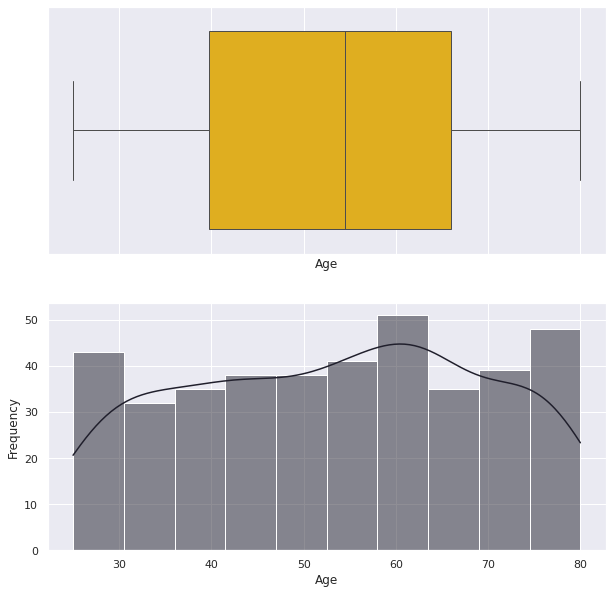

<Figure size 720x720 with 0 Axes>

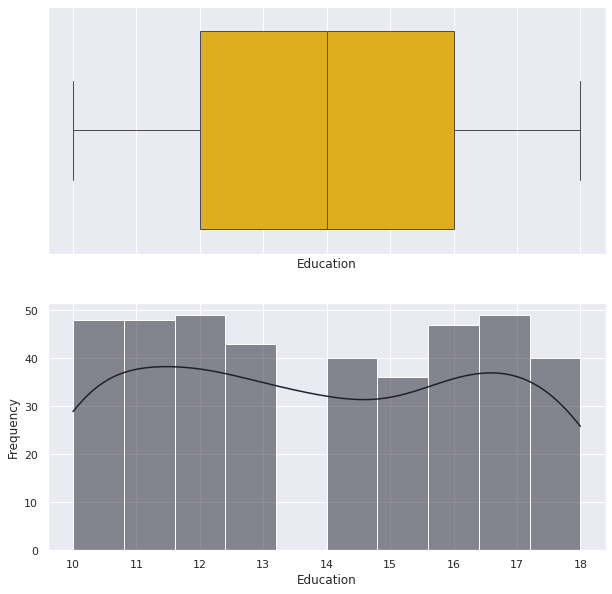

In [13]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="bone")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="Wistia_r")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="Wistia_r")

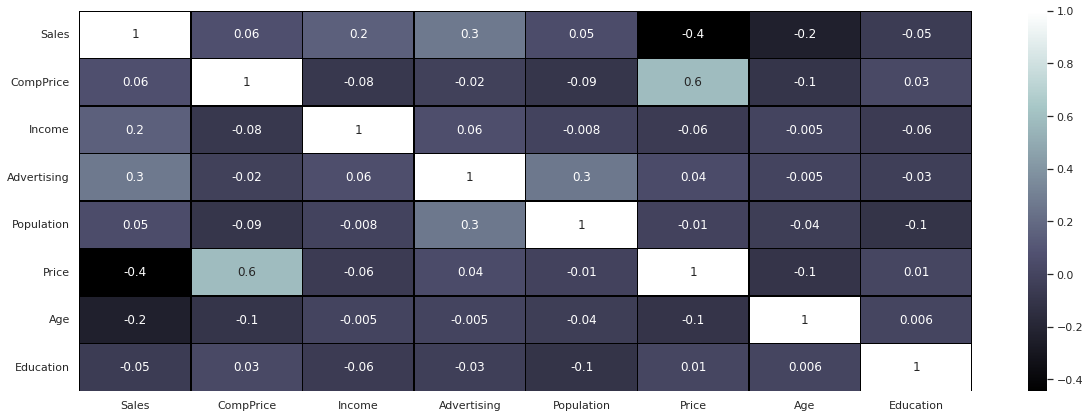

In [14]:
plt.figure(figsize=(20,7))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="bone", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

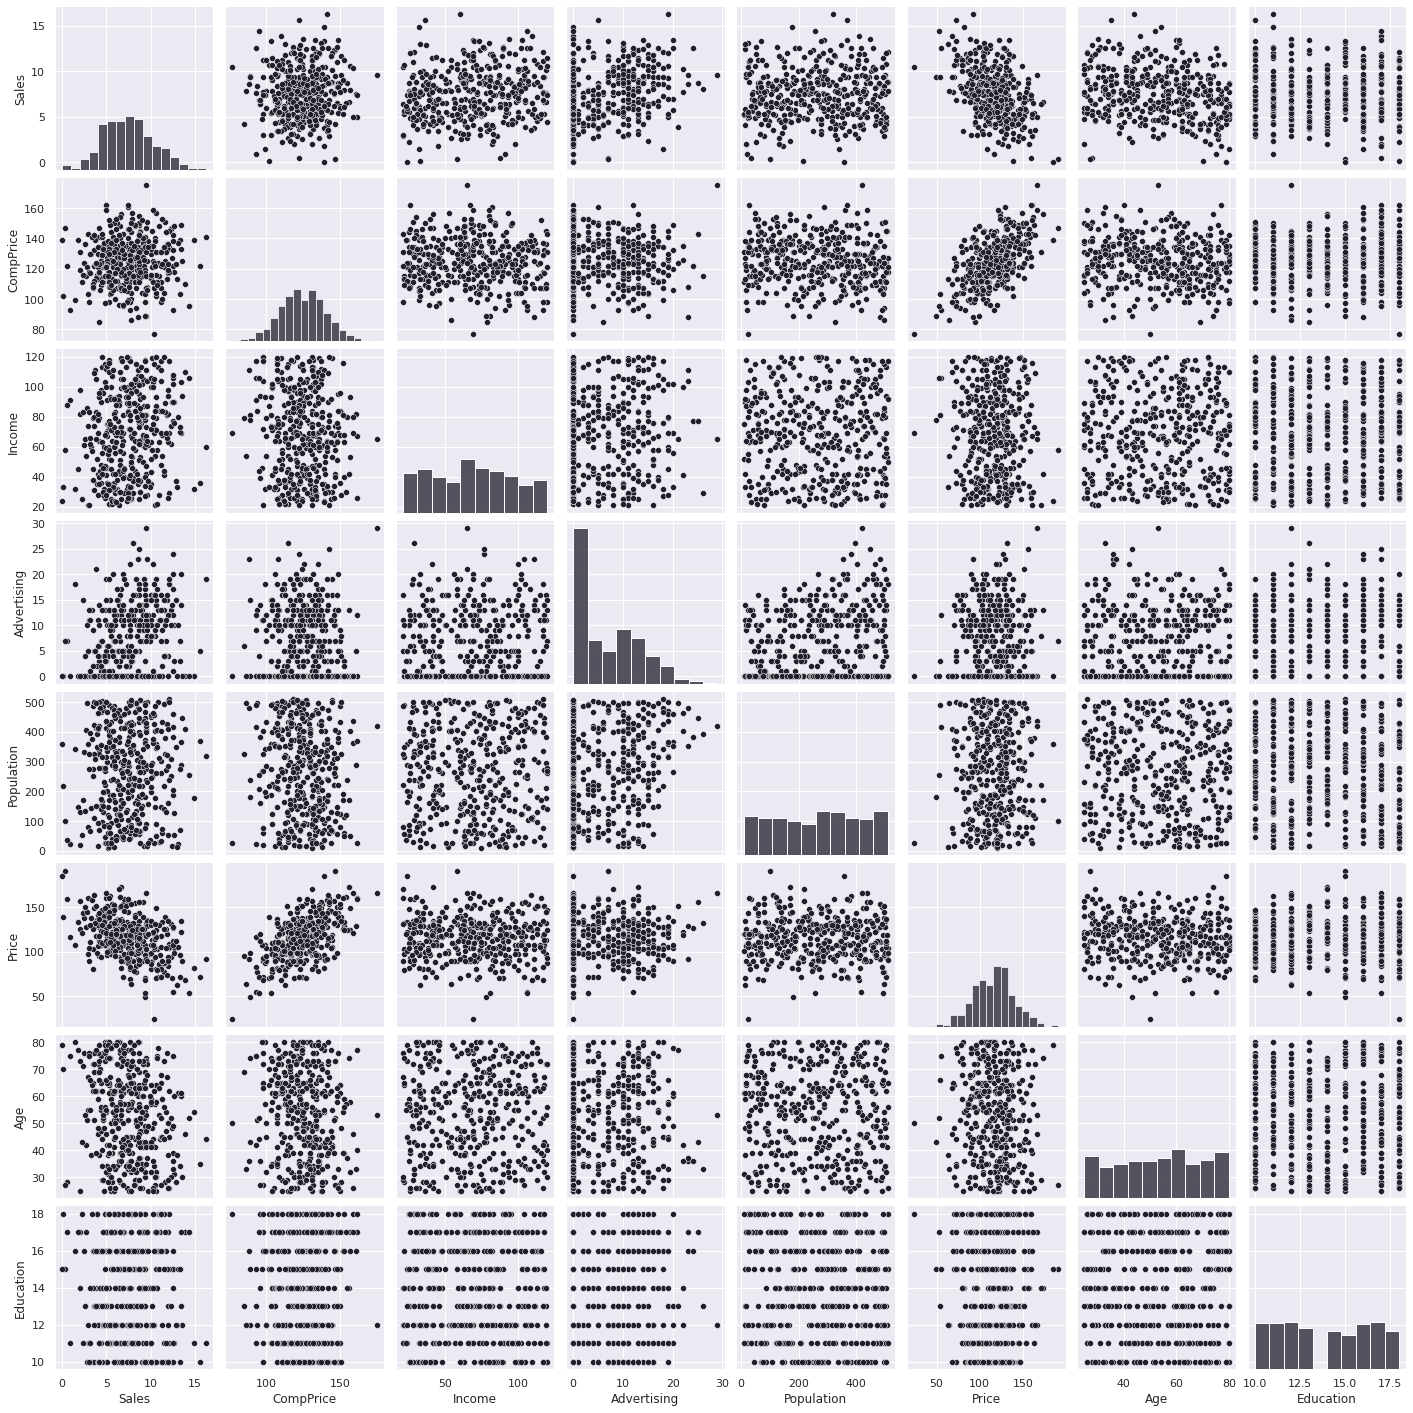

In [15]:
#pairwise plot of all the features
sns.pairplot(df)
plt.show()

# **Decision Tree**

## **Encoding variables**


In [16]:
data=df.copy()
data['US'] = data['US'].map({'Yes':1 ,'No':0})
data['Urban'] = data['Urban'].map({'Yes':1 ,'No':0})
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

## **Feature Scalling**

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data

array([[0.58389674, 0.62244898, 0.52525253, ..., 0.875     , 1.        ,
        1.        ],
       [0.68961278, 0.34693878, 0.27272727, ..., 0.        , 1.        ,
        1.        ],
       [0.61831592, 0.36734694, 0.14141414, ..., 0.25      , 1.        ,
        1.        ],
       ...,
       [0.45543946, 0.86734694, 0.05050505, ..., 1.        , 1.        ,
        1.        ],
       [0.36508912, 0.23469388, 0.58585859, ..., 0.25      , 1.        ,
        1.        ],
       [0.59680393, 0.58163265, 0.16161616, ..., 0.75      , 1.        ,
        1.        ]])

In [18]:
scaled_data = pd.DataFrame(scaled_data, columns = df.columns)
scaled_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,0.0,0.145455,0.500,1.0,1.0
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,0.5,0.545455,0.125,0.0,1.0
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,0.5,0.272727,1.000,1.0,1.0
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,1.0,0.454545,0.250,1.0,1.0


## **Independent and Dependent Variables**

In [19]:
x=scaled_data.iloc[:,1:]
y=scaled_data.iloc[:,0]

In [20]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.0,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.5,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.5,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,1.0,0.454545,0.250,1.0,1.0


In [21]:
y

0      0.583897
1      0.689613
2      0.618316
3      0.454825
4      0.255071
         ...   
395    0.772588
396    0.377382
397    0.455439
398    0.365089
399    0.596804
Name: Sales, Length: 400, dtype: float64

## **Splitting Data**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 10)
(120, 10)
(280,)
(120,)


# **Model Building**

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [26]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.4582


In [27]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts()

0.473878    5
0.274739    4
0.365089    4
0.258144    3
0.406884    3
           ..
0.680393    1
0.615243    1
0.661955    1
0.504610    1
0.539029    1
Length: 80, dtype: int64

In [28]:
df1 = pd.DataFrame({'actual': y_test, 'Prediction': preds})
df1.head()

,actual,Prediction
209,0.185618,0.314690
280,0.175784,0.274739
33,0.539029,0.652735
210,0.267978,0.299939
93,0.544561,0.529195


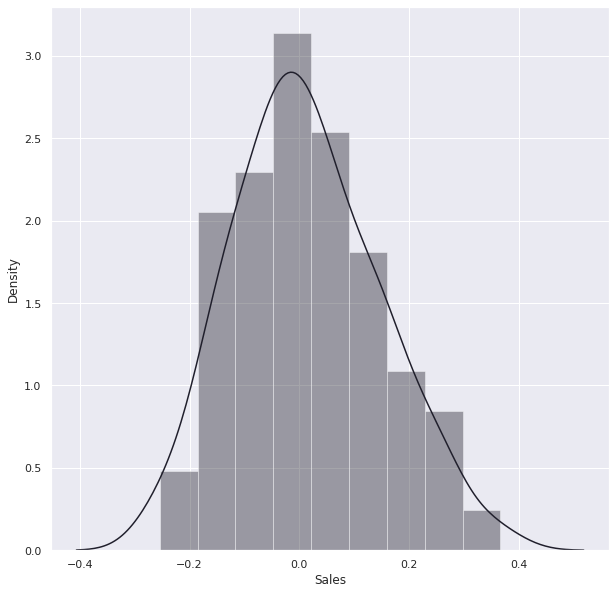

In [29]:
# checking difference between labled y and predicted y
sns.distplot(y_test-preds)

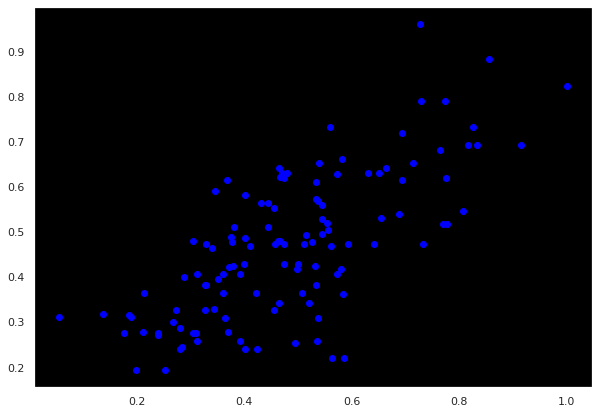

In [30]:
plt.figure(figsize=(10,7))
plt.axes(facecolor='black')
plt.scatter(y_test,preds, color = "blue")
plt.grid()
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score, mean_squared_error,classification_report

# RMSE for train data
train_preds_grid = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)


# RMSE for test data
test_preds_grid = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)
print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.0 

 test rmse = 0.1317457984278144 




In [32]:
from sklearn import metrics
print('R^2_score:', metrics.r2_score(y_test,preds))

R^2_score: 0.4581673305467818


# **Grid-Search for  model tuning**

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [34]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [35]:
tuning_model=GridSearchCV(model,param_grid=parameters,scoring='neg_mean_squared_error',verbose=3)

In [36]:
tuning_model.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.027 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.023 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.029 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.029 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.033 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=random;, s

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [37]:
print(tuning_model.best_score_ ,'\n',"\n" , tuning_model.best_params_)

-0.0183161327059155 
 
 {'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [38]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='log2',max_leaf_nodes=10,
                                         min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [39]:
# fitting model
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='log2', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1)

In [40]:
# prediction 
tuned_pred=tuned_hyper_model.predict(X_test)

In [41]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(tuned_hyper_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(tuned_hyper_model.score(X_test, y_test)))

Training set score: 0.2491
Test set score: 0.1182


In [42]:
from sklearn import metrics
print('R^2_score:', metrics.r2_score(y_test,tuned_pred))

R^2_score: 0.11824703637111333


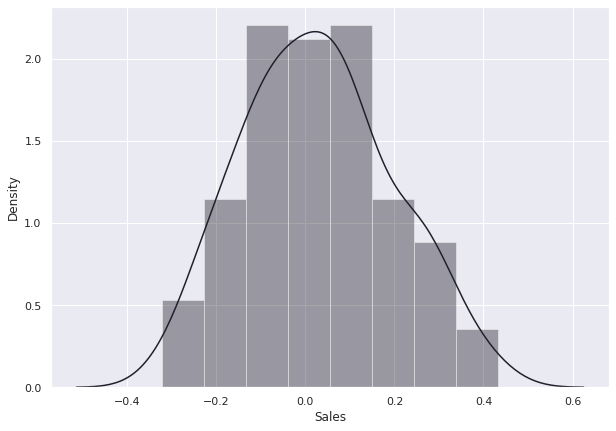

In [43]:
# checking difference between labled y and predicted y
plt.figure(figsize=(10,7))
sns.distplot(y_test-tuned_pred)

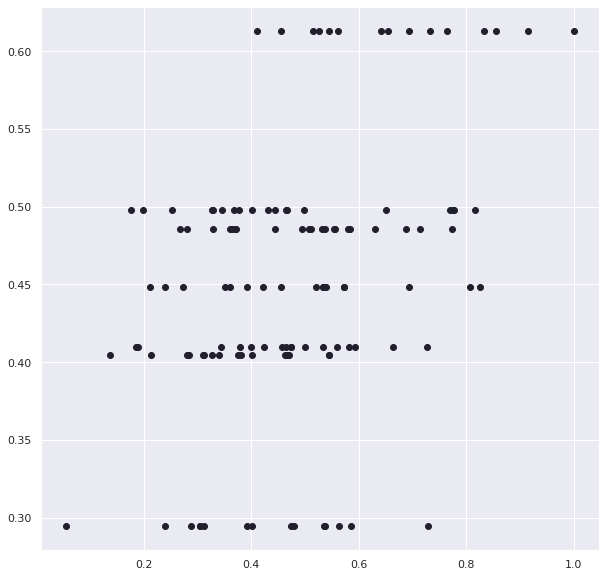

In [44]:
plt.scatter(y_test,tuned_pred)

In [45]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 0.13631659767185275
MSE: 0.028245891636528866
RMSE: 0.16806514105110812


In [46]:
# without hyperparameter tuning 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 0.10528580208973569
MSE: 0.017356955403382304
RMSE: 0.1317457984278144


In [47]:
df=pd.DataFrame({'Actual':y_test, 'Tuned_Predicted':tuned_pred , 'Predicted': preds})
df.head(5)

,Actual,Tuned_Predicted,Predicted
209,0.185618,0.409588,0.314690
280,0.175784,0.497987,0.274739
33,0.539029,0.448174,0.652735
210,0.267978,0.485756,0.299939
93,0.544561,0.404801,0.529195


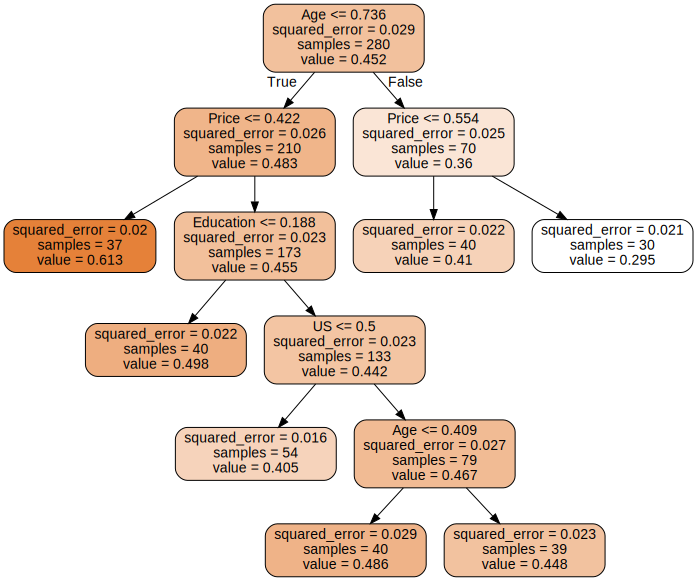

In [48]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(tuned_hyper_model, filled=True, rounded=True, feature_names=x.columns, out_file=None)
graphviz.Source(dot_data)

# **Improving Model Accuracy**

In [49]:
model = DecisionTreeRegressor(random_state = 42)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 6.74585291e-10, 2.69834116e-09, 6.07126761e-09,
       6.07126761e-09, 6.07126762e-09, 6.07126762e-09, 1.07933646e-08,
       1.07933646e-08, 1.68646323e-08, 1.68646323e-08, 2.42850705e-08,
       3.30546792e-08, 4.40729057e-08, 5.46414085e-08, 5.46414085e-08,
       6.74585291e-08, 6.74585291e-08, 6.74585291e-08, 6.74585291e-08,
       8.16248202e-08, 9.71402818e-08, 9.71402818e-08, 9.71402818e-08,
       9.71402818e-08, 1.14004914e-07, 1.32218717e-07, 1.32218717e-07,
       1.32218717e-07, 1.51781690e-07, 1.51781690e-07, 1.52006552e-07,
       1.72693834e-07, 1.72693834e-07, 1.72693834e-07, 1.72693834e-07,
       1.72693834e-07, 1.72693834e-07, 2.18565634e-07, 2.43525290e-07,
       2.43525290e-07, 2.59940199e-07, 2.69834116e-07, 2.69834116e-07,
       2.97492113e-07, 2.97492113e-07, 2.97492113e-07, 2.97492113e-07,
       3.26499281e-07, 3.56855619e-07, 3.56855619e-07, 3.56855619e-07,
       3.56855619e-07, 3.78217486e-07, 3.88561127e-07, 3.96656151e-07,
      

In [50]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.005675821097120698


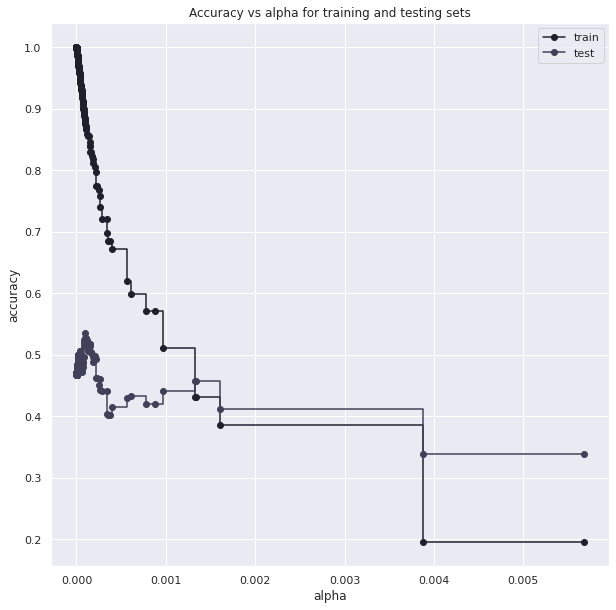

In [51]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

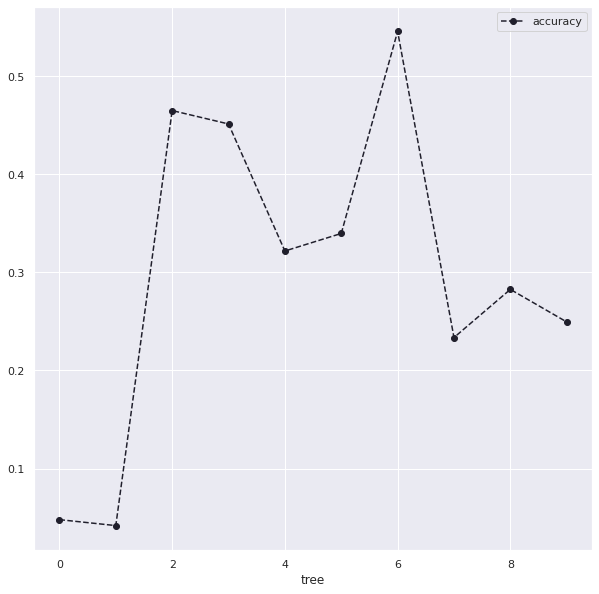

In [52]:
model=DecisionTreeRegressor(random_state = 42 ,ccp_alpha=0.0014)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True, random_state=10)
scores = cross_val_score(model, X_train, y_train, cv=cv)

df=pd.DataFrame(data={'tree':range(10),'accuracy': scores})
df.plot(x='tree',y='accuracy', marker='o',linestyle='--')

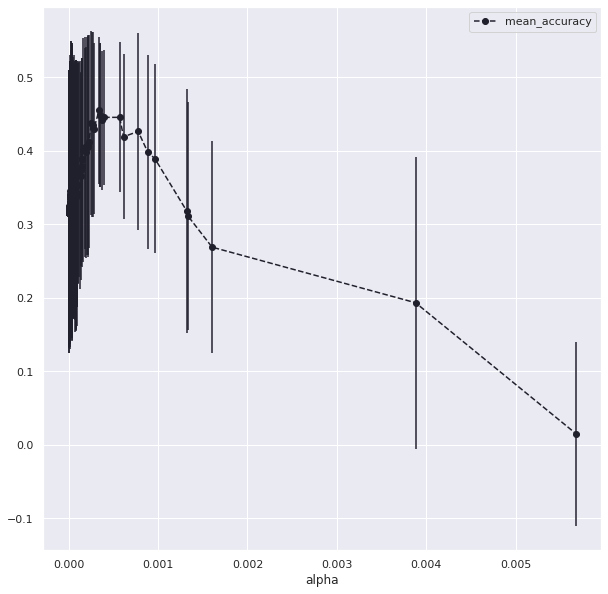

In [53]:
import numpy as np

alpha_loop_values=[]

for ccp_alpha in ccp_alphas:
  model=DecisionTreeRegressor(random_state = 42,
                               ccp_alpha=ccp_alpha)
  cv = KFold(n_splits=10, shuffle=True, random_state=10)
  scores = cross_val_score(model, X_train, y_train, cv=cv)
  alpha_loop_values.append([ccp_alpha, np.mean(scores),np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [54]:
alpha_results=alpha_results[(alpha_results['alpha']>0.000)
              &
              (alpha_results['alpha']<0.001)].sort_values(by=['mean_accuracy'], ascending=False).iloc[0:1,:]
alpha_results

,alpha,mean_accuracy,std
255,0.000341,0.455535,0.100086


In [55]:
ideal_ccp_alpha=alpha_results['alpha']
ideal_ccp_alpha              

255    0.000341
Name: alpha, dtype: float64

In [56]:
ideal_ccp_alpha=float(ideal_ccp_alpha[0:])
ideal_ccp_alpha

0.00034082755895391005

In [57]:
pruned_model=DecisionTreeRegressor(ccp_alpha=ideal_ccp_alpha,
                                random_state = 0)
pruned_model=pruned_model.fit(X_train,y_train)

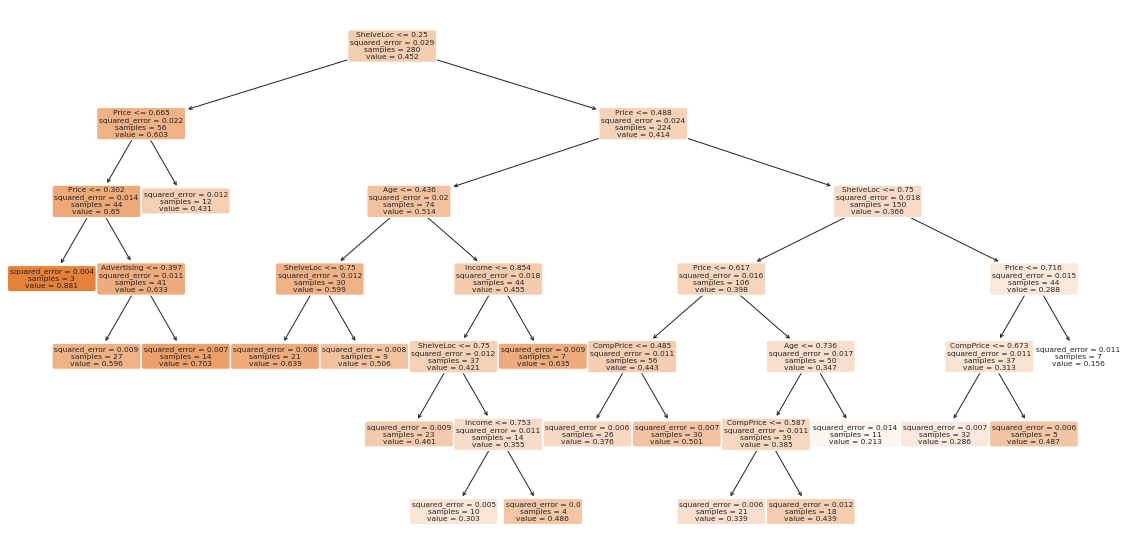

In [58]:
#PLot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(pruned_model, filled = True , rounded = True , feature_names = x.columns);

In [59]:
#Predicting on test data
pruned_preds = pruned_model.predict(X_test) # predicting on test data set 
pd.Series(pruned_preds).value_counts()

0.461051    17
0.596394    14
0.500676    14
0.285802    12
0.702564     8
0.375680     8
0.439118     8
0.338865     7
0.303258     6
0.639213     5
0.431264     5
0.156467     4
0.212941     3
0.506044     3
0.635350     2
0.880557     2
0.486908     1
0.486017     1
dtype: int64

In [60]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(pruned_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(pruned_model.score(X_test, y_test)))

Training set score: 0.7213
Test set score: 0.4414


In [61]:
from sklearn import metrics
print('R^2_score:', metrics.r2_score(y_test,pruned_preds))

R^2_score: 0.44139893798777274


In [62]:
df1 = pd.DataFrame({'actual': y_test, 'Pruned Prediction': pruned_preds})
df1.head()

,actual,Pruned Prediction
209,0.185618,0.303258
280,0.175784,0.156467
33,0.539029,0.702564
210,0.267978,0.285802
93,0.544561,0.461051


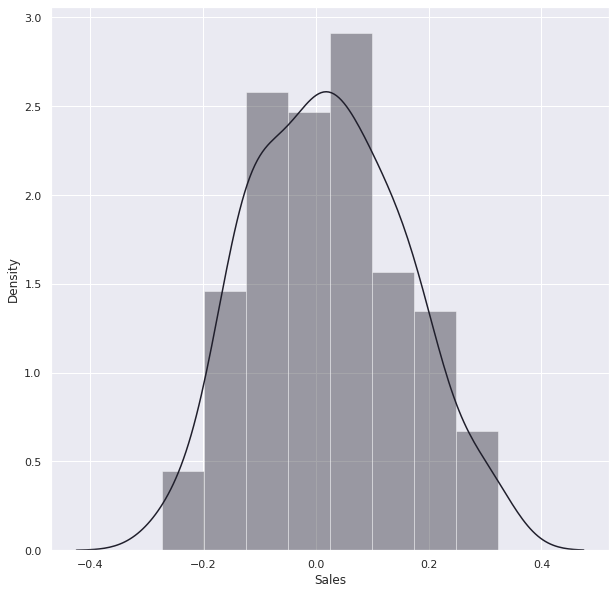

In [63]:
# checking difference between labled y and predicted y
sns.distplot(y_test-pruned_preds)

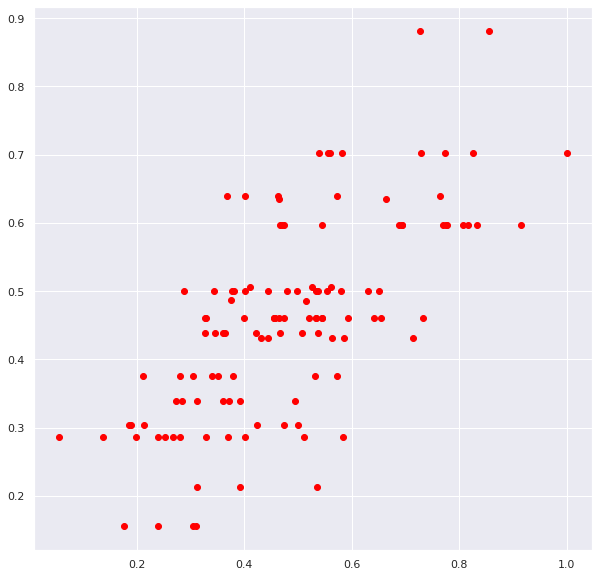

In [64]:
plt.scatter(y_test,pruned_preds, color = 'red')

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score, mean_squared_error,classification_report

# RMSE for train data
train_preds_grid = pruned_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = np.sqrt(train_mse)

# RMSE for test data
test_preds_grid = pruned_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = np.sqrt(test_mse)
print(f'\n train rmse = {train_rmse} \n\n test rmse = {test_rmse} \n\n')


 train rmse = 0.08984183601003635 

 test rmse = 0.13376887012411812 




# **Feature importnace**

In [66]:
pruned_model.feature_importances_

array([0.08378063, 0.06252423, 0.01777139, 0.        , 0.35780492,
       0.37129566, 0.10682317, 0.        , 0.        , 0.        ])

In [67]:
FI = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': pruned_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
FI                   

,feature,importance
5,ShelveLoc,0.371296
4,Price,0.357805
6,Age,0.106823
0,CompPrice,0.083781
1,Income,0.062524
2,Advertising,0.017771
3,Population,0.000000
7,Education,0.000000
8,Urban,0.000000
9,US,0.000000


Advantages Of Decision Tree Classification
Enlisted below are the various merits of Decision Tree Classification:

1. Decision tree classification does not require any domain knowledge, hence, it is appropriate for the knowledge discovery process.
2. The representation of data in the form of the tree is easily understood by humans and it is intuitive.
3. It can handle multidimensional data.
4. It is a quick process with great accuracy.


---
Disadvantages Of Decision Tree Classification
Given below are the various demerits of Decision Tree Classification:

1. Sometimes decision trees become very complex and these are called overfitted trees.
2. The decision tree algorithm may not be an optimal solution.
3. The decision trees may return a biased solution if some class label dominates it.

# **R-Squared Of 2 Different Methods**

In [68]:
df1 = pd.DataFrame({'actual': y_test, 'Prediction': preds,  'Gini_Prediction': pruned_preds})
df1.head()

,actual,Prediction,Gini_Prediction
209,0.185618,0.314690,0.303258
280,0.175784,0.274739,0.156467
33,0.539029,0.652735,0.702564
210,0.267978,0.299939,0.285802
93,0.544561,0.529195,0.461051


In [69]:
print('R^2_score:', metrics.r2_score(y_test,preds))
print('R^2_score:', metrics.r2_score(y_test,pruned_preds))

R^2_score: 0.4581673305467818
R^2_score: 0.44139893798777274


> By checking Three different method we came up with the conclusion that the performance of decision tree regressor without alpha values is giving us a best R-Squared and same compare to other model.